# Clustering with mean pooled embeddings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import umap
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/similar_cases/8192_embeddings.json'

df = pd.read_json(file_path)

df["mean_embedding"] = df["mean_embedding"].apply(lambda x: np.array(x, dtype=np.float32))
df["max_embedding"] = df["max_embedding"].apply(lambda x: np.array(x, dtype=np.float32))

Mounted at /content/drive


In [3]:
NUM_CLUSTERS = 10
MIN_CLUSTER_SIZE = 5

In [4]:
X = np.vstack(df["mean_embedding"].values)

pca = PCA(n_components=2)
X_mean_pca = pca.fit_transform(X)

reducer = umap.UMAP(n_components=2)
X_mean_umap = reducer.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000)
X_mean_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [5]:
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
df["mean_kmeans_cluster"] = kmeans.fit_predict(X)

hdb = HDBSCAN(min_cluster_size=MIN_CLUSTER_SIZE, metric="cosine")
df["mean_hdbscan_cluster"] = hdb.fit_predict(X)

In [6]:
df.head()

,docket_id,summary,mean_embedding,max_embedding,mean_kmeans_cluster,mean_hdbscan_cluster
0,119293,For docket number 12-3705 of case United State...,"[0.015109853, -0.051369593, 0.024283925, 0.001...","[0.02971867, -0.0062833307, 0.027635893, 0.012...",2,2
1,1088363,For docket number 17-60417 of case Cerrell Dar...,"[-0.015262693, 0.014277754, -0.03668878, 0.007...","[-0.015262693, 0.014277754, -0.03668878, 0.007...",6,4
2,3050501,"For docket number 2015-1767, 2015-1768 of case...","[0.011641735, 0.01640439, 0.009877033, -0.0535...","[0.011641735, 0.01640439, 0.009877033, -0.0535...",3,-1
3,4239842,For docket number 16-10572 of case Connie Lee ...,"[-0.0027212608, 0.07355376, 0.021716898, -0.02...","[-0.0027212608, 0.07355376, 0.021716898, -0.02...",6,4
4,4246017,For docket number 1:04-mj-00312 of case United...,"[-0.011532358, -0.020075137, -0.023055423, -0....","[-0.011532358, -0.020075137, -0.023055423, -0....",3,-1


In [7]:
df["mean_hdbscan_cluster"].nunique()

7

# Clustering with max pooled embeddings

In [8]:
X = np.vstack(df["max_embedding"].values)

pca = PCA(n_components=2)
X_max_pca = pca.fit_transform(X)

reducer = umap.UMAP(n_components=2)
X_max_umap = reducer.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000)
X_max_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [9]:
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
df["max_kmeans_cluster"] = kmeans.fit_predict(X)

hdb = HDBSCAN(min_cluster_size=MIN_CLUSTER_SIZE, metric="cosine")
df["max_hdbscan_cluster"] = hdb.fit_predict(X)

In [10]:
df.head()

,docket_id,summary,mean_embedding,max_embedding,mean_kmeans_cluster,mean_hdbscan_cluster,max_kmeans_cluster,max_hdbscan_cluster
0,119293,For docket number 12-3705 of case United State...,"[0.015109853, -0.051369593, 0.024283925, 0.001...","[0.02971867, -0.0062833307, 0.027635893, 0.012...",2,2,5,-1
1,1088363,For docket number 17-60417 of case Cerrell Dar...,"[-0.015262693, 0.014277754, -0.03668878, 0.007...","[-0.015262693, 0.014277754, -0.03668878, 0.007...",6,4,1,5
2,3050501,"For docket number 2015-1767, 2015-1768 of case...","[0.011641735, 0.01640439, 0.009877033, -0.0535...","[0.011641735, 0.01640439, 0.009877033, -0.0535...",3,-1,7,-1
3,4239842,For docket number 16-10572 of case Connie Lee ...,"[-0.0027212608, 0.07355376, 0.021716898, -0.02...","[-0.0027212608, 0.07355376, 0.021716898, -0.02...",6,4,1,5
4,4246017,For docket number 1:04-mj-00312 of case United...,"[-0.011532358, -0.020075137, -0.023055423, -0....","[-0.011532358, -0.020075137, -0.023055423, -0....",3,-1,5,-1


In [11]:
df["max_hdbscan_cluster"].nunique()

7

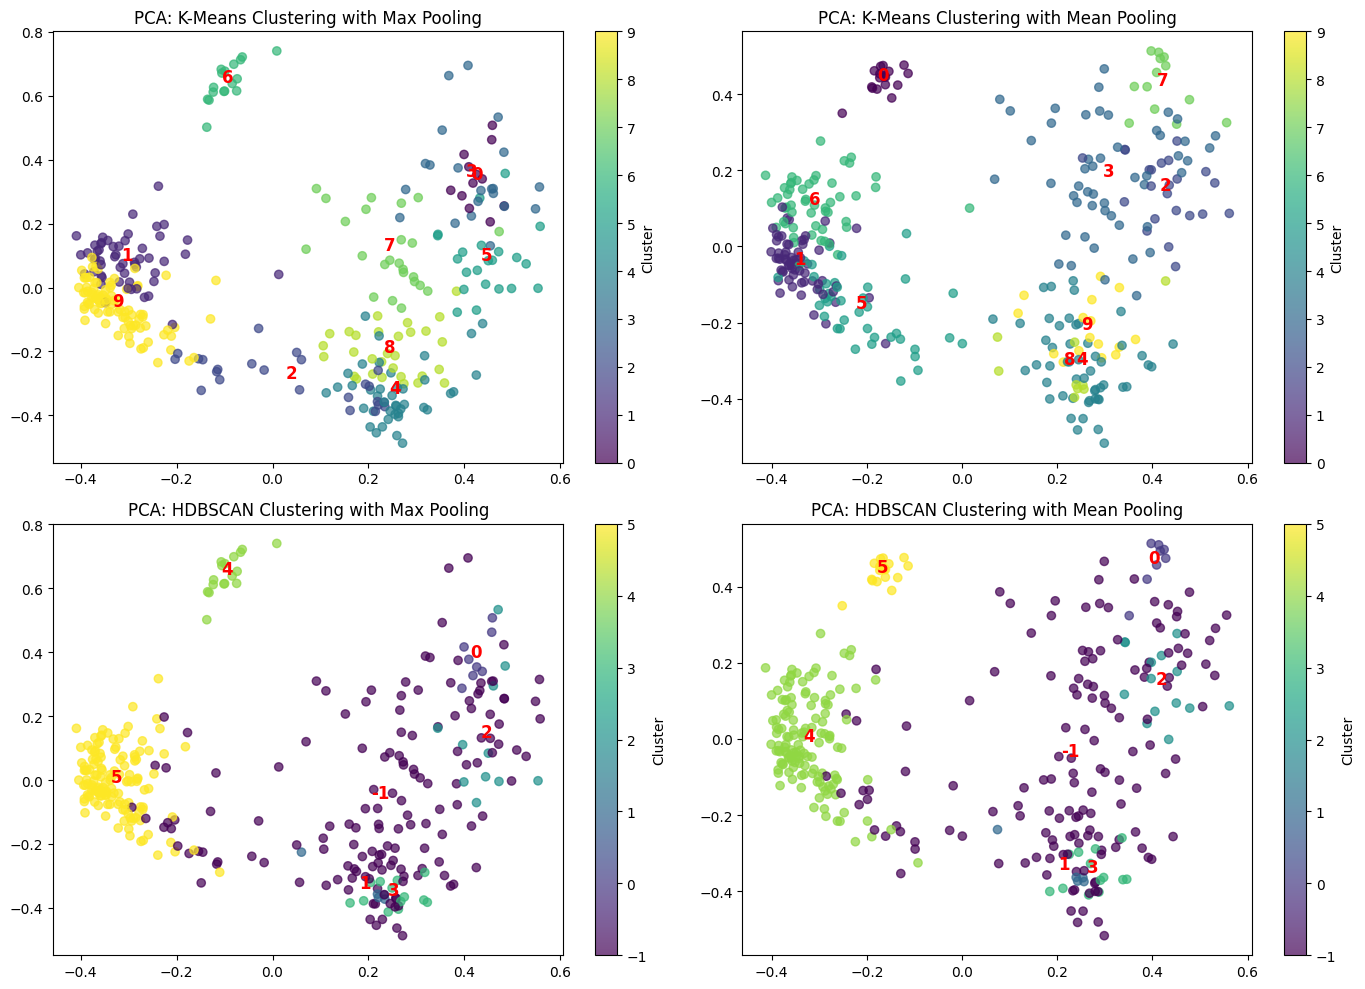

In [12]:
cluster_columns = ["max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]
titles = ["PCA: K-Means Clustering with Max Pooling", "PCA: K-Means Clustering with Mean Pooling",
          "PCA: HDBSCAN Clustering with Max Pooling", "PCA: HDBSCAN Clustering with Mean Pooling"]


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, cluster_col, title in zip(axes.flatten(), cluster_columns, titles):
    # Select the right PCA results
    X_pca = X_max_pca if "max" in cluster_col else X_mean_pca
    clusters = df[cluster_col]

    # Scatter plot with better color distinction
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)

    # Add cluster numbers at cluster centroids
    for cluster_id in np.unique(clusters):
        cluster_points = X_pca[clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        ax.text(centroid[0], centroid[1], str(cluster_id), fontsize=12, fontweight="bold", ha="center", color="red")

    # Add colorbar and title
    fig.colorbar(scatter, ax=ax, label="Cluster")
    ax.set_title(title)

plt.tight_layout()
plt.show()

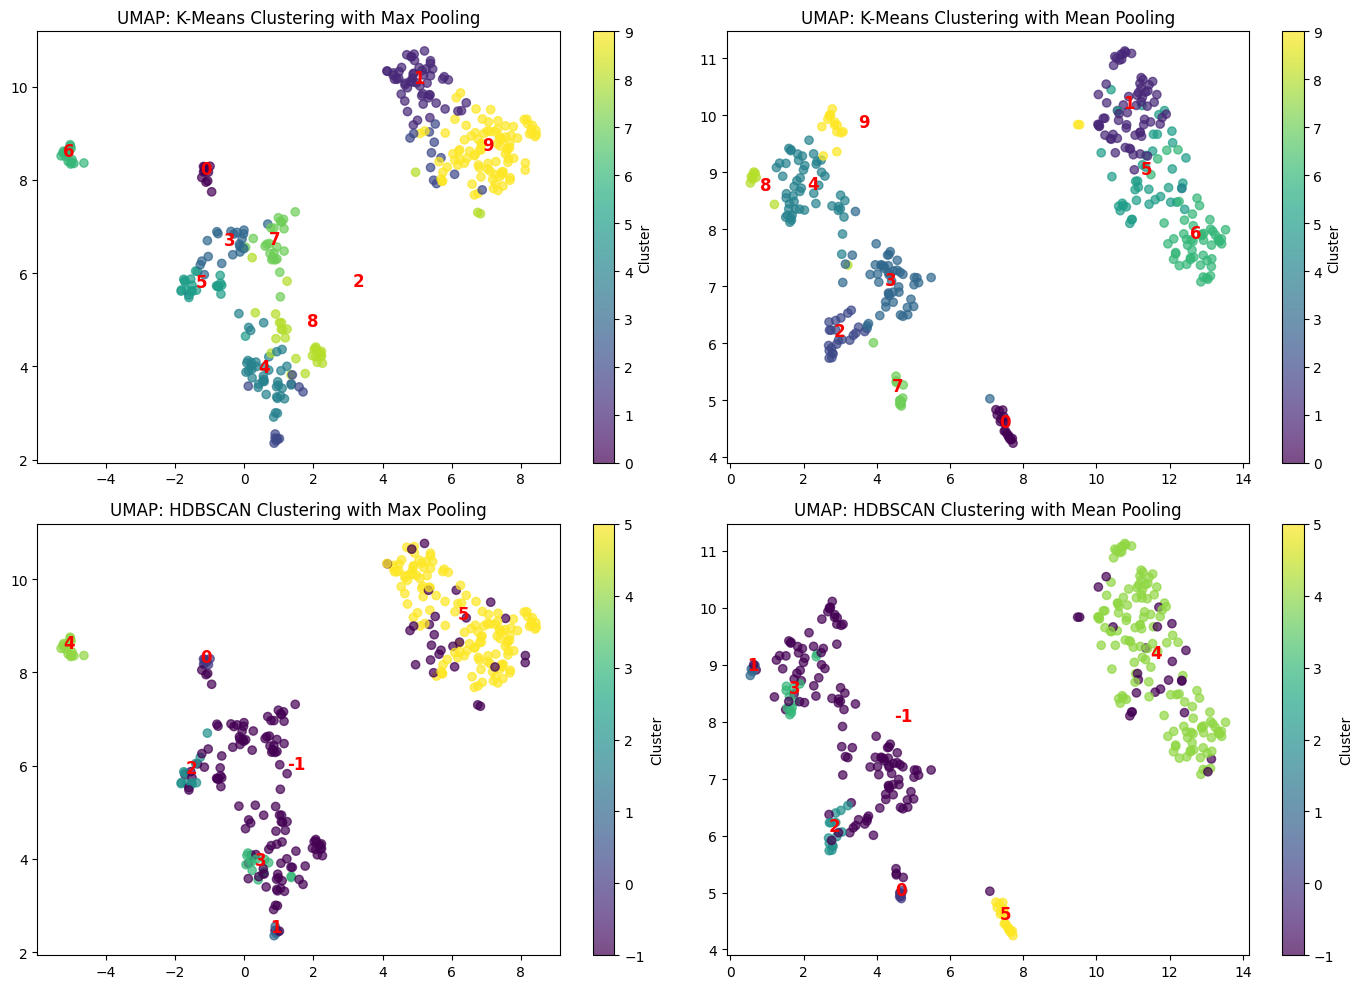

In [13]:
cluster_columns = ["max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]
titles = ["UMAP: K-Means Clustering with Max Pooling", "UMAP: K-Means Clustering with Mean Pooling",
          "UMAP: HDBSCAN Clustering with Max Pooling", "UMAP: HDBSCAN Clustering with Mean Pooling"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, cluster_col, title in zip(axes.flatten(), cluster_columns, titles):
    # Select the right UMAP results
    X_umap = X_max_umap if "max" in cluster_col else X_mean_umap
    clusters = df[cluster_col]

    # Scatter plot with better color distinction
    scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap="viridis", alpha=0.7)

    # Add cluster numbers at cluster centroids
    for cluster_id in np.unique(clusters):
        cluster_points = X_umap[clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        ax.text(centroid[0], centroid[1], str(cluster_id), fontsize=12, fontweight="bold", ha="center", color="red")

    # Add colorbar and title
    fig.colorbar(scatter, ax=ax, label="Cluster")
    ax.set_title(title)

plt.tight_layout()
plt.show()

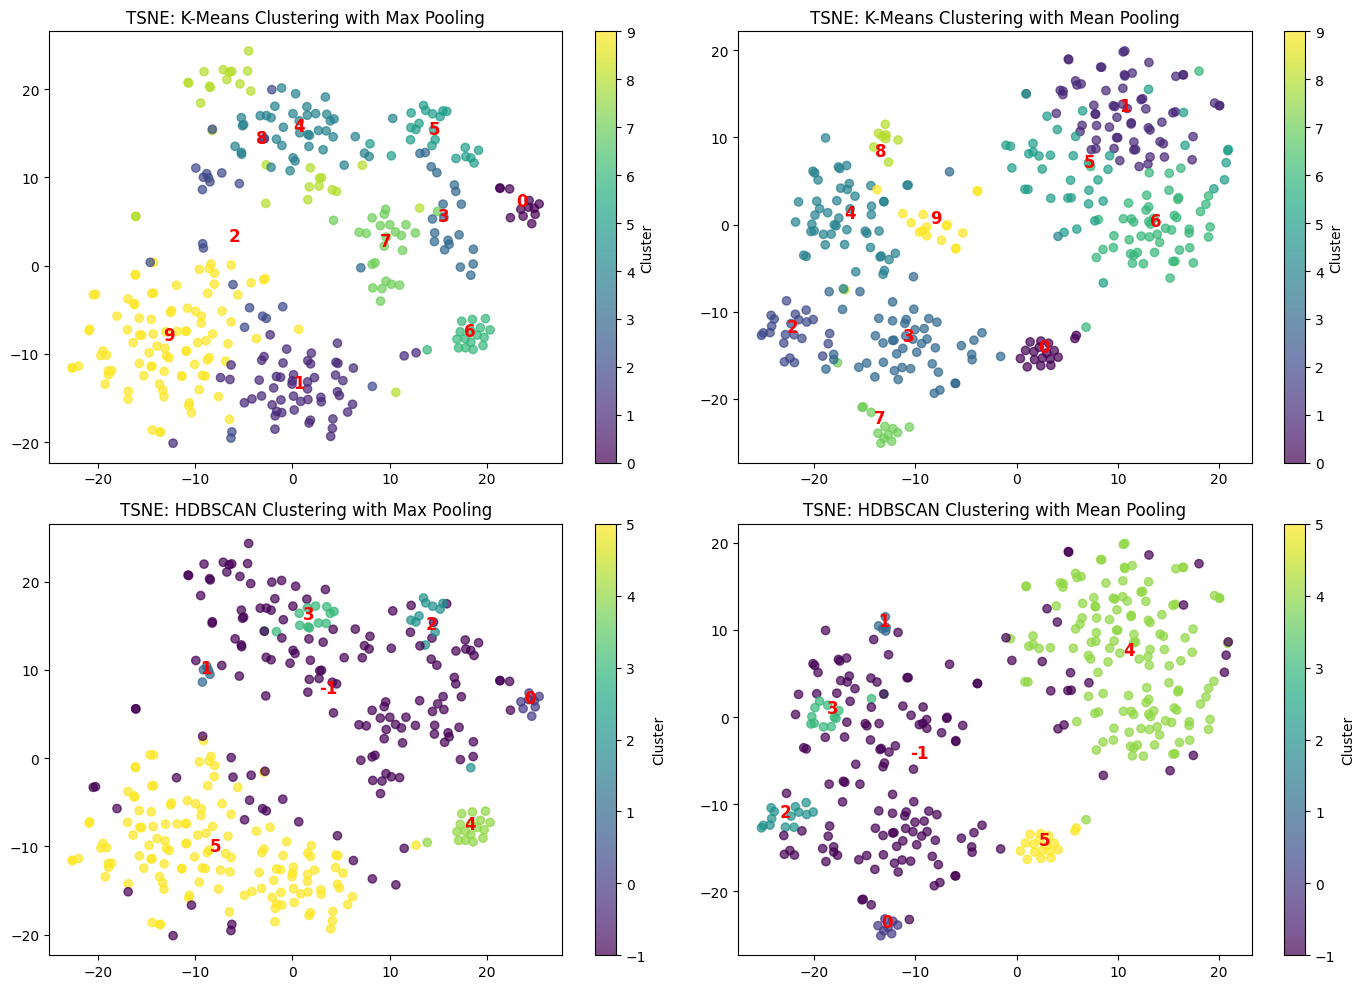

In [14]:
cluster_columns = ["max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]
titles = ["TSNE: K-Means Clustering with Max Pooling", "TSNE: K-Means Clustering with Mean Pooling",
          "TSNE: HDBSCAN Clustering with Max Pooling", "TSNE: HDBSCAN Clustering with Mean Pooling"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, cluster_col, title in zip(axes.flatten(), cluster_columns, titles):
    # Select the right TSNE results
    X_tsne = X_max_tsne if "max" in cluster_col else X_mean_tsne
    clusters = df[cluster_col]

    # Scatter plot with better color distinction
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap="viridis", alpha=0.7)

    # Add cluster numbers at cluster centroids
    for cluster_id in np.unique(clusters):
        cluster_points = X_tsne[clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        ax.text(centroid[0], centroid[1], str(cluster_id), fontsize=12, fontweight="bold", ha="center", color="red")

    # Add colorbar and title
    fig.colorbar(scatter, ax=ax, label="Cluster")
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [15]:
from google.colab import drive
drive.mount('/content/drive')

df = df[["docket_id", "summary", "max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]]

file_path = '/content/drive/MyDrive/similar_cases/8192_clusters.csv'
df.to_csv(file_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/similar_cases/8192_clusters.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df[(df["max_kmeans_cluster"] == 6) & (df["mean_kmeans_cluster"] == 0)]

,docket_id,summary,max_kmeans_cluster,mean_kmeans_cluster,max_hdbscan_cluster,mean_hdbscan_cluster
10,4545485,For docket number 16-11141 of case Rosewood Oa...,6,0,4,5
46,6375361,For docket number 18-43732 of case Derrick Kin...,6,0,4,5
53,6773237,For docket number 2-17-20825 of case Richard A...,6,0,4,5
62,7277125,For docket number 18-80448 of case Gina C Schw...,6,0,4,5
117,15112040,For docket number 07-11206 of case Janice Beat...,6,0,4,5
118,15128374,For docket number 08-02396 of case Larry D Bir...,6,0,4,5
119,15232605,For docket number 10-16299 of case Maciej Bern...,6,0,4,5
120,15291151,For docket number 11-16593 of case Tomasz Buck...,6,0,4,5
121,15305137,For docket number 11-30494 of case Gladys Yako...,6,0,4,5
123,15476901,For docket number 15-06668 of case Irecha I Sm...,6,0,4,5


In [4]:
df[(df["max_kmeans_cluster"] == 9) & (df["mean_kmeans_cluster"] == 1)]

,docket_id,summary,max_kmeans_cluster,mean_kmeans_cluster,max_hdbscan_cluster,mean_hdbscan_cluster
50,6706604,For docket number 18-12374 of case EDDIE LAWRE...,9,1,5,4
54,6858705,For docket number 18-40448 of case Jeremiah Sc...,9,1,5,4
67,7476729,For docket number 2:18-bk-54522 of case Bryan ...,9,1,5,4
70,7560308,For docket number 18-03059 of case Daniel J. T...,9,1,5,4
75,8089490,For docket number 2:18-bk-51825 of case Michae...,9,1,5,4
...,...,...,...,...,...,...
317,68297453,For docket number 6:24-bk-10975 of case Joseph...,9,1,5,4
320,68881314,For docket number 24-13505 of case Rodney Quei...,9,1,5,4
333,69382698,For docket number 8:24-bk-06773 of case Kimber...,9,1,5,4
334,69391743,For docket number 8:24-bk-06835 of case Eufald...,9,1,5,4


In [10]:
df[(df["max_kmeans_cluster"] == 7) & (df["mean_kmeans_cluster"] == 3)]

,docket_id,summary,max_kmeans_cluster,mean_kmeans_cluster,max_hdbscan_cluster,mean_hdbscan_cluster
2,3050501,"For docket number 2015-1767, 2015-1768 of case...",7,3,-1,-1
7,4316694,For docket number 2:10-cv-00646 of case Townse...,7,3,-1,-1
15,4797653,For docket number 1:00-cv-01738 of case Pacifi...,7,3,-1,-1
18,5053011,For docket number 2:05-cv-00118 of case Davis ...,7,3,-1,-1
19,5090219,For docket number 4:12-cv-00352 of case French...,7,3,-1,-1
20,5113001,For docket number 3:11-cv-00454 of case O'Dell...,7,3,-1,-1
22,5154358,For docket number 5:13-cv-00293 of case WELLS ...,7,3,-1,-1
26,5335719,For docket number 2:13-cv-14904 of case Murray...,7,3,-1,-1
34,5645304,For docket number 4:16-cv-00465 of case Jackso...,7,3,-1,-1
40,6042861,For docket number 3:11-cv-00730 of case Galler...,7,3,-1,-1


In [7]:
df[(df["max_kmeans_cluster"] == 0) & (df["mean_kmeans_cluster"] == 7)]

,docket_id,summary,max_kmeans_cluster,mean_kmeans_cluster,max_hdbscan_cluster,mean_hdbscan_cluster
14,4662800,For docket number 7:04-cv-00741 of case Price ...,0,7,0,0
17,4999410,For docket number 2:11-cv-00048 of case Schaef...,0,7,0,0
27,5360937,For docket number 2:15-cv-01234 of case Jones ...,0,7,0,0
28,5393050,For docket number 2:12-cv-02057 of case Gillia...,0,7,0,0
31,5509176,For docket number 2:11-cv-00284 of case Shaffe...,0,7,0,0
64,7337379,For docket number 6:18-cv-01191 of case Zenner...,0,7,0,0
136,15781472,For docket number 1:19-cv-04024 of case Trocch...,0,7,-1,-1
144,16297786,For docket number 3:19-cv-01594-IM of case Gri...,0,7,-1,-1
145,16376660,For docket number 2:19-cv-00809 of case Suda v...,0,7,-1,-1
146,16399937,For docket number 1:19-cv-24471 of case Hansen...,0,7,-1,-1
